This Project is inspired by A book called <strong> The Data Analysis Workshop<strong> written by (Gururajan Govindan, Shubhangi Hora, and Konstantin Palagachev)

## Importing the main libraries and data

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [4]:
#loading the dataset
filepath = os.path.join(os.getcwd(),'hour.csv')
hourly_data =pd.read_csv(filepath)

## Data exploration

In [9]:
# print some generic statistics about the data
#Printing the Shape of the data
print(f"Shape of data: {hourly_data.shape}")

#Printing the Number of Total Missing Values,, Note Here you will find 2 Sums() 
# first one to Calc the sum in Every row,
# Second one to Calc the sum overall

print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data: 0


In [12]:
# get statistics on the numerical columns
hourly_data.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [14]:
hourly_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1   0        0        6           0   
1        2  01/01/2011       1   0     1   1        0        6           0   
2        3  01/01/2011       1   0     1   2        0        6           0   
3        4  01/01/2011       1   0     1   3        0        6           0   
4        5  01/01/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

## PreProcessing

In [15]:
# create a copy of the original data AS a roleback if anything went wrong
preprocessed_data = hourly_data.copy()

### Trasnforming

We will be working on the following Columns
- Season (Winter : 1, Spring : 2, Summer : 3  and Fall : 4)
- Year (2011 : 0 , 2012 : 1)
- Weekday (Saturday , Sunday, Monday, Tuesday, Wednesday, Thursday)


In [16]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [23]:
# Printing the Unique Values
preprocessed_data['season'].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [24]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [25]:
# Printing the Unique Values
preprocessed_data['yr'].unique()

array([2011, 2012], dtype=int64)

In [26]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [27]:
# Printing the Unique Values
preprocessed_data['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [28]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [29]:
# Printing the Unique Values
preprocessed_data['weathersit'].unique()

array(['clear', 'cloudy', 'light_rain_snow', 'heavy_rain_snow'],
      dtype=object)

In [33]:
# We are dividing by 67 because it's the Max number
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] *67

In [34]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

season    yr    weekday       weathersit   hum  windspeed
5792   summer  2011   Saturday            clear  74.0     8.9981
7823     fall  2011     Sunday            clear  43.0    31.0009
15426    fall  2012    Tuesday           cloudy  77.0     6.0032
15028    fall  2012     Sunday            clear  51.0    22.0028
12290  spring  2012     Friday           cloudy  89.0    12.9980
3262   spring  2011     Friday            clear  64.0     7.0015
10763  spring  2012   Thursday            clear  42.0    23.9994
12384  spring  2012    Tuesday  light_rain_snow  82.0    11.0014
6051   summer  2011  Wednesday            clear  52.0    19.0012
948    winter  2011   Saturday            clear  80.0     0.0000

## Analysis Part

In [45]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

C:\Users\Tariq\AppData\Local\Temp\ipykernel_2748\1660711149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['registered'], label='registered')
C:\Users\Tariq\AppData\Local\Temp\ipykernel_2748\1660711149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['

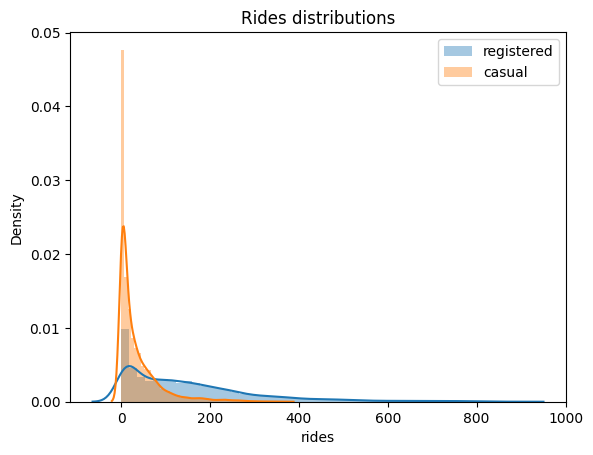

In [56]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions");
plt.savefig('figs/rides_distributions.png', format='png')

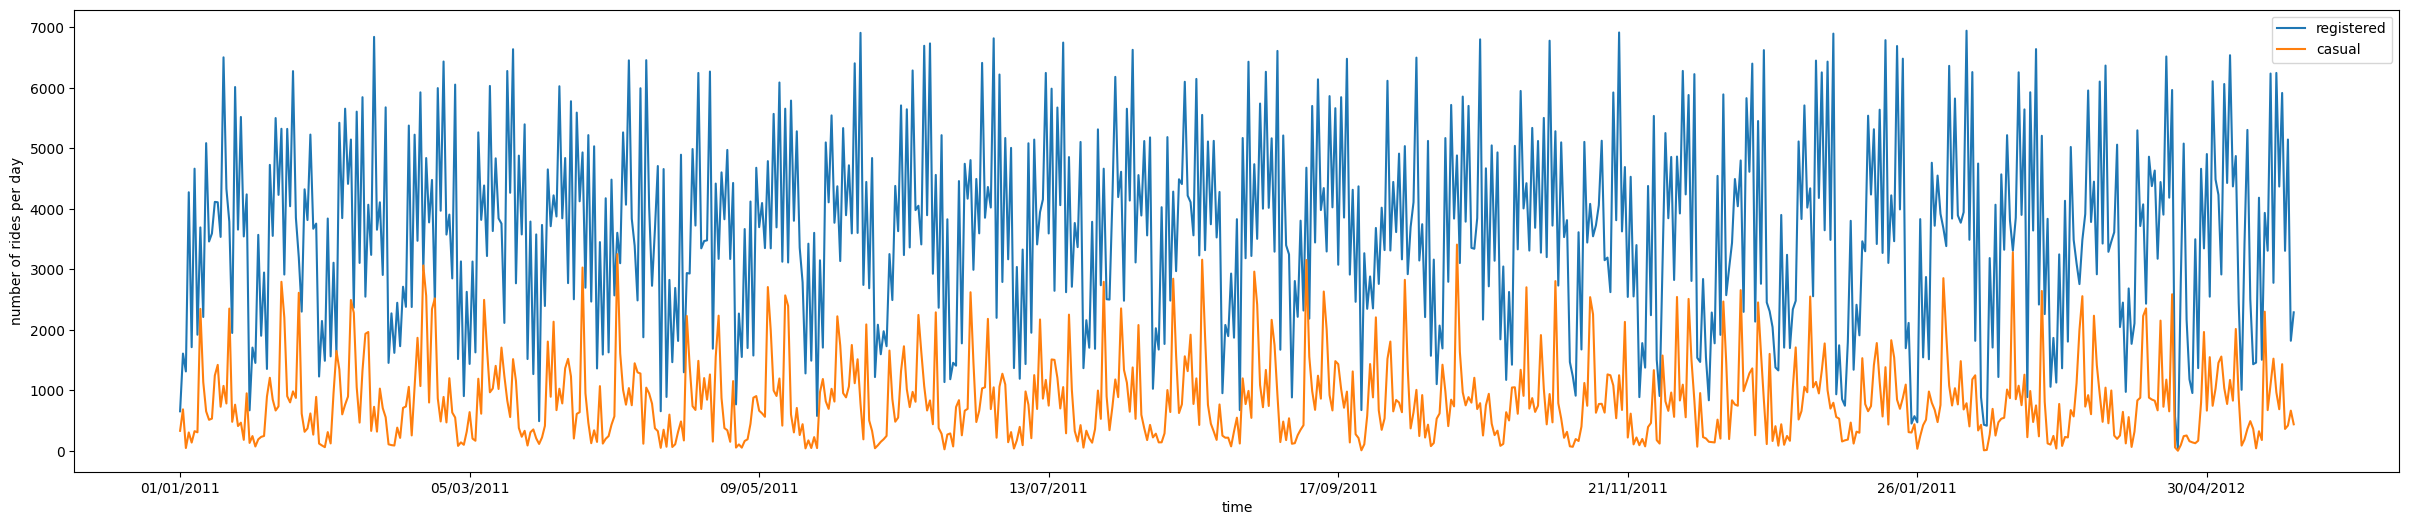

In [68]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(30,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_daily.png', format='png')

In [66]:
preprocessed_data[preprocessed_data['dteday'] == '01/01/2011']

instant      dteday  season    yr  mnth  hr  holiday   weekday  \
0         1  01/01/2011  winter  2011     1   0        0  Saturday   
1         2  01/01/2011  winter  2011     1   1        0  Saturday   
2         3  01/01/2011  winter  2011     1   2        0  Saturday   
3         4  01/01/2011  winter  2011     1   3        0  Saturday   
4         5  01/01/2011  winter  2011     1   4        0  Saturday   
5         6  01/01/2011  winter  2011     1   5        0  Saturday   
6         7  01/01/2011  winter  2011     1   6        0  Saturday   
7         8  01/01/2011  winter  2011     1   7        0  Saturday   
8         9  01/01/2011  winter  2011     1   8        0  Saturday   
9        10  01/01/2011  winter  2011     1   9        0  Saturday   
10       11  01/01/2011  winter  2011     1  10        0  Saturday   
11       12  01/01/2011  winter  2011     1  11        0  Saturday   
12       13  01/01/2011  winter  2011     1  12        0  Saturday   
13       14  01/01/2011  winter  2011     1  13        0  Saturday   
14       15  01/01/2011  winter  2011     1  14        0  Saturday   
15       16  01/01/2011  winter  2011     1  15        0  Saturday   
16       17  01/01/2011  winter  2011     1  16        0  Saturday   
17       18  01/01/2011  winter  2011     1  17        0  Saturday   
18       19  01/01/2011  winter  2011     1  18        0  Saturday   
19       20  01/01/2011  winter  2011     1  19        0  Saturday   
20       21  01/01/2011  winter  2011     1  20        0  Saturday   
21       22  01/01/2011  winter  2011     1  21        0  Saturday   
22       23  01/01/2011  winter  2011     1  22        0  Saturday   
23       24  01/01/2011  winter  2011     1  23        0  Saturday   

    workingday       weathersit  temp   atemp   hum  windspeed  casual  \
0            0            clear  0.24  0.2879  81.0     0.0000       3   
1            0            clear  0.22  0.2727  80.0     0.0000       8   
2            0            clear  0.22  0.2727  80.0     0.0000       5   
3            0            clear  0.24  0.2879  75.0     0.0000       3   
4            0            clear  0.24  0.2879  75.0     0.0000       0   
5            0           cloudy  0.24  0.2576  75.0     6.0032       0   
6            0            clear  0.22  0.2727  80.0     0.0000       2   
7            0            clear  0.20  0.2576  86.0     0.0000       1   
8            0            clear  0.24  0.2879  75.0     0.0000       1   
9            0            clear  0.32  0.3485  76.0     0.0000       8   
10           0            clear  0.38  0.3939  76.0    16.9979      12   
11           0            clear  0.36  0.3333  81.0    19.0012      26   
12           0            clear  0.42  0.4242  77.0    19.0012      29   
13           0           cloudy  0.46  0.4545  72.0    19.9995      47   
14           0           cloudy  0.46  0.4545  72.0    19.0012      35   
15           0           cloudy  0.44  0.4394  77.0    19.9995      40   
16           0           cloudy  0.42  0.4242  82.0    19.9995      41   
17           0           cloudy  0.44  0.4394  82.0    19.0012      15   
18           0  light_rain_snow  0.42  0.4242  88.0    16.9979       9   
19           0  light_rain_snow  0.42  0.4242  88.0    16.9979       6   
20           0           cloudy  0.40  0.4091  87.0    16.9979      11   
21           0           cloudy  0.40  0.4091  87.0    12.9980       3   
22           0           cloudy  0.40  0.4091  94.0    15.0013      11   
23           0           cloudy  0.46  0.4545  88.0    19.9995      15   

    registered  cnt  
0           13   16  
1           32   40  
2           27   32  
3           10   13  
4            1    1  
5            1    1  
6            0    2  
7            2    3  
8            7    8  
9            6   14  
10          24   36  
11          30   56  
12          55   84  
13          47   94  
14          71  106  
15          70  110  
16          52   93  
17    

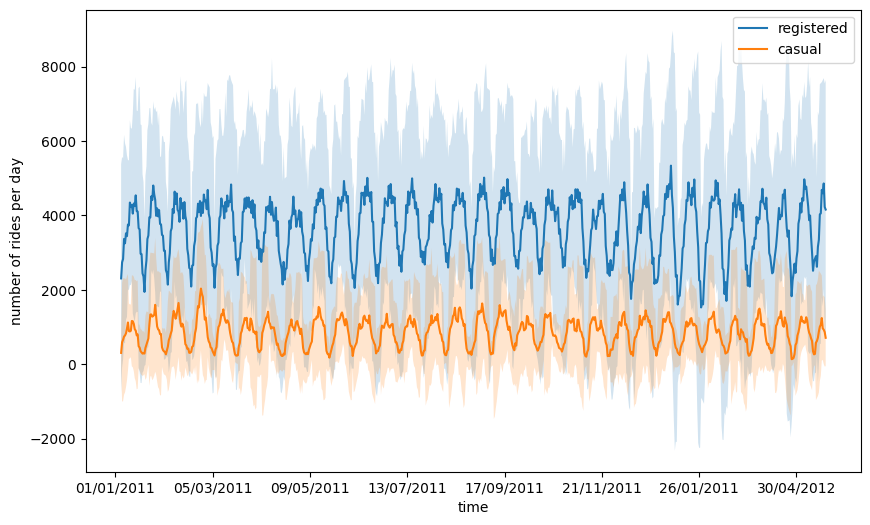

In [69]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""

plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_aggregated.png', format='png')